# –°–µ–≥–º–µ–Ω—Ç–∞—Ü–∏—è –∑–∞–∫–∞–∑–æ–≤ Instacart –ø–æ –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º (aisles)
*–î–∞—Ç–∞ —Å–æ–∑–¥–∞–Ω–∏—è –Ω–æ—É—Ç–±—É–∫–∞: 2025-05-02*

–í —ç—Ç–æ–º –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏–∏ –º—ã:
1. –ó–∞–≥—Ä—É–∑–∏–º –¥–∞–Ω–Ω—ã–µ **Instacart**,
2. –ü—Ä–µ–¥—Å—Ç–∞–≤–∏–º –∫–∞–∂–¥—ã–π –∑–∞–∫–∞–∑ –∫–∞–∫ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ–∫—É–ø–æ–∫ –ø–æ –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º (aisle),
3. –ü–æ–¥–±–µ—Ä—ë–º –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–µ —á–∏—Å–ª–æ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ *k* —Å –ø–æ–º–æ—â—å—é —Å–∏–ª—É—ç—Ç‚Äë–º–µ—Ç—Ä–∏–∫–∏,
4. –ö–ª–∞—Å—Ç–µ—Ä–∏–∑—É–µ–º –∑–∞–∫–∞–∑—ã –º–µ—Ç–æ–¥–æ–º **K‚ÄëMeans**,


In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
from scipy import sparse
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

plt.style.use('default')

In [2]:

# --- –ü–∞—Ä–∞–º–µ—Ç—Ä—ã ---
DATA_DIR = Path(r'D:\instacart\archive')   # –ø–∞–ø–∫–∞ —Å CSV‚Äë—Ñ–∞–π–ª–∞–º–∏
SAMPLE_SIZE = 20000             # –ø–æ–¥–≤—ã–±–æ—Ä–∫–∞ –¥–ª—è —Å–∏–ª—É—ç—Ç–∞
K_MIN, K_MAX = 2, 10            # –¥–∏–∞–ø–∞–∑–æ–Ω k
RANDOM_STATE = 42


In [3]:

def read_csv_minimal(path, usecols=None, dtype=None):
    return pd.read_csv(path, usecols=usecols, dtype=dtype)

print('‚è≥ –ó–∞–≥—Ä—É–∂–∞–µ–º —Ç–∞–±–ª–∏—Ü—ã‚Ä¶')
products = read_csv_minimal(
    DATA_DIR / 'products.csv',
    usecols=['product_id', 'aisle_id'],
    dtype={'product_id': 'int32', 'aisle_id': 'int16'}
)
orders = read_csv_minimal(
    DATA_DIR / 'orders.csv',
    usecols=['order_id', 'user_id'],
    dtype={'order_id': 'int32', 'user_id': 'int32'}
)
prior = read_csv_minimal(
    DATA_DIR / 'order_products__prior.csv',
    usecols=['order_id', 'product_id'],
    dtype={'order_id': 'int32', 'product_id': 'int32'}
)
train = read_csv_minimal(
    DATA_DIR / 'order_products__train.csv',
    usecols=['order_id', 'product_id'],
    dtype={'order_id': 'int32', 'product_id': 'int32'}
)
order_products = pd.concat([prior, train], ignore_index=True)
del prior, train
print('‚úÖ –î–∞–Ω–Ω—ã–µ –∑–∞–≥—Ä—É–∂–µ–Ω—ã')


‚è≥ –ó–∞–≥—Ä—É–∂–∞–µ–º —Ç–∞–±–ª–∏—Ü—ã‚Ä¶
‚úÖ –î–∞–Ω–Ω—ã–µ –∑–∞–≥—Ä—É–∂–µ–Ω—ã


In [4]:
order_products

order_id  product_id
0                2       33120
1                2       28985
2                2        9327
3                2       45918
4                2       30035
...            ...         ...
33819101   3421063       14233
33819102   3421063       35548
33819103   3421070       35951
33819104   3421070       16953
33819105   3421070        4724

[33819106 rows x 2 columns]

In [5]:
order_products = order_products.merge(products, on='product_id', how='left')
order_products

order_id  product_id  aisle_id
0                2       33120        86
1                2       28985        83
2                2        9327       104
3                2       45918        19
4                2       30035        17
...            ...         ...       ...
33819101   3421063       14233       115
33819102   3421063       35548        13
33819103   3421070       35951        91
33819104   3421070       16953        88
33819105   3421070        4724        32

[33819106 rows x 3 columns]

–í —Ä–µ–∑—É–ª—å—Ç–∞—Ç–µ –º–Ω–æ–≥–æ—á–∏—Å–ª–µ–Ω–Ω—ã—Ö –∏—Ç–µ—Ä–∞—Ü–∏–π —Å–µ–≥–º–µ–Ω—Ç–∞—Ü–∏–∏ –±—ã–ª–æ –ø—Ä–∏–Ω—è—Ç–æ —Ä–µ—à–µ–Ω–∏–µ –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∏—Ä–æ–≤–∞—Ç—å –∑–∞–∫–∞–∑—ã –ø–æ –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º —Ç–æ–≤–∞—Ä–æ–≤ (aisles –ø–æ—Ç–æ–º—Ü —á—Ç–æ –ø—Ä–∏ —Å–æ–∑–¥–∞–Ω–∏–∏ order x item –º–∞—Ç—Ä–∏—Ü—ã –Ω—É–∂–Ω–æ –æ–≥—Ä–æ–º–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ä–µ—Å—É—Ä—Å–æ–≤ (—Ç–æ–≤–∞—Ä–æ–≤ –ø—Ä–∏–º–µ—Ä–Ω–æ 50000, –∑–Ω–∞—á–∏—Ç –ø–æ–ª—É—á–∏—Ç—å—Å—è –º–∞—Ç—Ä–∏—Ü–∞ 3–∫–∫ x 50–∫)) —Ç–∞–∫–∂–µ –±—ã–ª–æ —Ä–µ—à–µ–Ω–æ –Ω–µ —É—á–∏—Ç—ã–≤–∞—Ç—å –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ —Å —Ñ—Ä—É–∫—Ç–∞–º–∏ –∏ –æ–≤–æ—â–∞–º–∏, –ø–æ—Ç–æ–º—É —á—Ç–æ –∏—Ö –≤ –∑–∞–∫–∞–∑–∞—Ö –∞–±—Å–æ–ª—é—Ç–Ω–æ–µ –±–æ–ª—å—à–µ–Ω—Å—Ç–≤–æ, –∏ —Ç–∞–∫–∂–µ –Ω–µ —É—á–∏—Ç—ã–≤–∞—Ç—å –Ω–µ –ø–æ–ø—É–ª—è—Ä–Ω–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏

In [6]:
aisles = pd.read_csv(
        DATA_DIR / 'aisles.csv',
        dtype={'aisle_id': 'int16', 'aisle': 'category'}
    )

aisle_name = aisles.set_index('aisle_id')['aisle'].to_dict()


# –°—á–∏—Ç–∞–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–∫–∞–∑–æ–≤ –ø–æ –∫–∞–∂–¥–æ–π –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ (aisle_id)
aisle_counts = order_products['aisle_id'].value_counts().reset_index()
aisle_counts.columns = ['aisle_id', 'num_orders']

# –î–æ–±–∞–≤–∏–º –Ω–∞–∑–≤–∞–Ω–∏—è –∫–∞—Ç–µ–≥–æ—Ä–∏–π
aisle_counts['aisle'] = aisle_counts['aisle_id'].map(aisle_name)

# –û—Ç—Å–æ—Ä—Ç–∏—Ä—É–µ–º –ø–æ —É–±—ã–≤–∞–Ω–∏—é –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –∑–∞–∫–∞–∑–æ–≤
aisle_counts = aisle_counts.sort_values('num_orders', ascending=False)

print(aisle_counts)

     aisle_id  num_orders                       aisle
0          24     3792661                fresh fruits
1          83     3568630            fresh vegetables
2         123     1843806  packaged vegetables fruits
3         120     1507583                      yogurt
4          21     1021462             packaged cheese
..        ...         ...                         ...
129        44        9522                eye ear care
130       102        8909         baby bath body care
131        82        8466            baby accessories
132       132        6455                      beauty
133       113        5147                frozen juice

[134 rows x 3 columns]


In [7]:
# –¢–æ–ø-5 –ø–æ–ø—É–ª—è—Ä–Ω—ã—Ö
top_aisles_ids = aisle_counts.head(5)['aisle_id'].tolist()

# –ö–∞—Ç–µ–≥–æ—Ä–∏–∏ –º–µ–Ω–µ–µ 10,000 –∑–∞–∫–∞–∑–æ–≤
rare_aisles_ids = aisle_counts[aisle_counts['num_orders'] < 10000]['aisle_id'].tolist()

# –í—Å–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏, –∫–æ—Ç–æ—Ä—ã–µ –Ω–µ –¥–æ–ª–∂–Ω—ã –ø–æ–ø–∞—Å—Ç—å –≤ –º–∞—Ç—Ä–∏—Ü—É
exclude_aisles = set(top_aisles_ids + rare_aisles_ids)
print("–ò—Å–∫–ª—é—á–∞–µ–º—ã–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏:", exclude_aisles)


–ò—Å–∫–ª—é—á–∞–µ–º—ã–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏: {132, 102, 10, 44, 113, 82, 83, 21, 24, 123, 120}


In [8]:
# #‚ûã  —Ñ–∏–ª—å—Ç—Ä—É–µ–º order_products
# filtered_order_products = order_products

In [9]:
print('\n–°–æ–∑–¥–∞—ë–º –º–∞—Ç—Ä–∏—Ü—É –∑–∞–∫–∞–∑ √ó –∫–∞—Ç–µ–≥–æ—Ä–∏—è (–±–µ–∑ –ø–æ–ø—É–ª—è—Ä–Ω—ã—Ö –∏ —Ä–µ–¥–∫–∏—Ö)‚Ä¶')

# ‚ûä  —Å–ø–∏—Å–æ–∫ –∫–∞—Ç–µ–≥–æ—Ä–∏–π, –∫–æ—Ç–æ—Ä—ã–µ –∏—Å–∫–ª—é—á–∞–µ–º

# ‚ûã  —Ñ–∏–ª—å—Ç—Ä—É–µ–º order_products
filtered_order_products = order_products[~order_products['aisle_id'].isin(exclude_aisles)]

# ‚ûå  crosstab ‚Üí DataFrame (0/1)
order_aisle = pd.crosstab(
    filtered_order_products['order_id'],
    filtered_order_products['aisle_id']
).astype('int8')


# ‚ûç  –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è –ø–æ —Å—Ç—Ä–æ–∫–∞–º (–ø—Ä–æ–ø–æ—Ä—Ü–∏–∏ –∫–∞—Ç–µ–≥–æ—Ä–∏–π)
order_aisle_norm = order_aisle.div(order_aisle.sum(axis=1), axis=0).fillna(0)

order_ids = order_aisle_norm.index.to_numpy(dtype='int32')
X_sparse  = sparse.csr_matrix(order_aisle_norm.values)

print('–§–æ—Ä–º–∞ –º–∞—Ç—Ä–∏—Ü—ã –ø—Ä–∏–∑–Ω–∞–∫–æ–≤:', X_sparse.shape)


–°–æ–∑–¥–∞—ë–º –º–∞—Ç—Ä–∏—Ü—É –∑–∞–∫–∞–∑ √ó –∫–∞—Ç–µ–≥–æ—Ä–∏—è (–±–µ–∑ –ø–æ–ø—É–ª—è—Ä–Ω—ã—Ö –∏ —Ä–µ–¥–∫–∏—Ö)‚Ä¶
–§–æ—Ä–º–∞ –º–∞—Ç—Ä–∏—Ü—ã –ø—Ä–∏–∑–Ω–∞–∫–æ–≤: (3255920, 123)


In [10]:
display(order_aisle)
display(order_aisle_norm)

aisle_id  1    2    3    4    5    6    7    8    9    11   ...  124  125  \
order_id                                                    ...             
1           0    0    0    0    0    0    0    0    0    0  ...    0    0   
2           0    0    0    0    0    0    0    0    0    0  ...    0    0   
3           0    0    0    0    0    0    0    0    0    0  ...    0    0   
4           0    0    1    0    0    0    0    0    0    1  ...    0    1   
5           1    0    0    1    0    0    0    0    0    0  ...    0    0   
...       ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
3421079     0    0    0    0    0    0    0    0    0    0  ...    0    0   
3421080     0    0    0    0    0    0    0    0    0    0  ...    0    0   
3421081     0    0    0    0    0    0    0    0    0    0  ...    0    0   
3421082     0    0    0    0    0    0    0    0    0    0  ...    0    0   
3421083     0    0    1    0    0    0    0    0    0    0  ...    0    0   

aisle_id  126  127  128  129  130  131  133  134  
order_id                                          
1           0    0    0    0    0    0    0    0  
2           0    0    0    0    0    0    0    0  
3           0    0    0    0    0    0    0    0  
4           0    0    0    0    0    0    0    0  
5           0    1    0    0    0    1    0    0  
...       ...  ...  ...  ...  ...  ...  ...  ...  
3421079     0    0    0    0    0    0    0    0  
3421080     0    0    0    0    0    0    0    0  
3421081     0    0    0    0    0    0    0    0  
3421082     0    0    0    0    0    0    0    0  
3421083     0    0    0    0    0    0    0    0  

[3255920 rows x 123 columns]

aisle_id       1    2         3         4    5    6    7    8    9    \
order_id                                                               
1         0.000000  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
2         0.000000  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
3         0.000000  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
4         0.000000  0.0  0.076923  0.000000  0.0  0.0  0.0  0.0  0.0   
5         0.055556  0.0  0.000000  0.055556  0.0  0.0  0.0  0.0  0.0   
...            ...  ...       ...       ...  ...  ...  ...  ...  ...   
3421079   0.000000  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
3421080   0.000000  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
3421081   0.000000  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
3421082   0.000000  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
3421083   0.000000  0.0  0.111111  0.000000  0.0  0.0  0.0  0.0  0.0   

aisle_id       11   ...  124       125  126       127  128  129  130  \
order_id            ...                                                
1         0.000000  ...  0.0  0.000000  0.0  0.000000  0.0  0.0  0.0   
2         0.000000  ...  0.0  0.000000  0.0  0.000000  0.0  0.0  0.0   
3         0.000000  ...  0.0  0.000000  0.0  0.000000  0.0  0.0  0.0   
4         0.076923  ...  0.0  0.076923  0.0  0.000000  0.0  0.0  0.0   
5         0.000000  ...  0.0  0.000000  0.0  0.055556  0.0  0.0  0.0   
...            ...  ...  ...       ...  ...       ...  ...  ...  ...   
3421079   0.000000  ...  0.0  0.000000  0.0  0.000000  0.0  0.0  0.0   
3421080   0.000000  ...  0.0  0.000000  0.0  0.000000  0.0  0.0  0.0   
3421081   0.000000  ...  0.0  0.000000  0.0  0.000000  0.0  0.0  0.0   
3421082   0.000000  ...  0.0  0.000000  0.0  0.000000  0.0  0.0  0.0   
3421083   0.000000  ...  0.0  0.000000  0.0  0.000000  0.0  0.0  0.0   

aisle_id       131  133  134  
order_id                      
1         0.000000  0.0  0.0  
2         0.000000  0.0  0.0  
3         0.000000  0.0  0.0  
4         0.000000  0.0  0.0  
5         0.055556  0.0  0.0  
...            ...  ...  ...  
3421079   0.000000  0.0  0.0  
3421080   0.000000  0.0  0.0  
3421081   0.000000  0.0  0.0  
3421082   0.000000  0.0  0.0  
3421083   0.000000  0.0  0.0  

[3255920 rows x 123 columns]

In [11]:
print('\nElbow‚Äë–º–µ—Ç–æ–¥ (–∏–Ω–µ—Ä—Ü–∏—è)‚Ä¶')
K_MIN, K_MAX = 2, 10
inertias = []

# StandardScaler –∂–µ–ª–∞—Ç–µ–ª–µ–Ω –¥–∞–∂–µ –ø–æ—Å–ª–µ –Ω–æ—Ä–º–∏—Ä–æ–≤–∫–∏ (–≤—ã—Ä–∞–≤–Ω–∏–≤–∞–µ—Ç –¥–∏—Å–ø–µ—Ä—Å–∏–∏ —Å—Ç–æ–ª–±—Ü–æ–≤)
scaler_elbow      = StandardScaler(with_mean=False)
X_scaled_elbow    = scaler_elbow.fit_transform(X_sparse)

for k in range(K_MIN, K_MAX + 1):
    km = KMeans(n_clusters=k, random_state=RANDOM_STATE, n_init='auto')
    km.fit(X_scaled_elbow)
    inertias.append(km.inertia_)
    print(f'k={k}, inertia={km.inertia_:,.0f}')



Elbow‚Äë–º–µ—Ç–æ–¥ (–∏–Ω–µ—Ä—Ü–∏—è)‚Ä¶
k=2, inertia=397,905,339
k=3, inertia=396,328,730
k=4, inertia=394,336,088
k=5, inertia=391,950,409
k=6, inertia=389,064,333
k=7, inertia=386,346,407
k=8, inertia=385,134,934
k=9, inertia=383,157,325
k=10, inertia=381,536,679


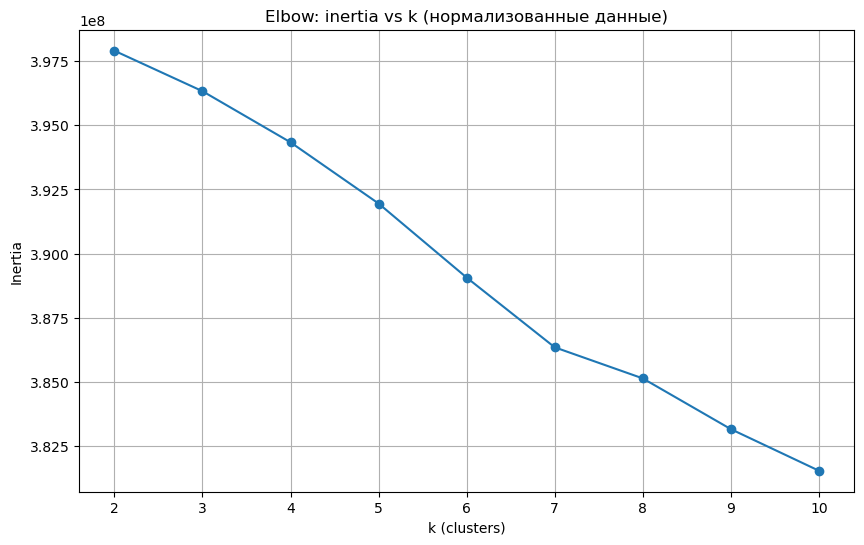

In [12]:

plt.figure(figsize=(10,6))
plt.plot(range(K_MIN, K_MAX + 1), inertias, marker='o')
plt.title('Elbow: inertia vs k (–Ω–æ—Ä–º–∞–ª–∏–∑–æ–≤–∞–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ)')
plt.xlabel('k (clusters)');  plt.ylabel('Inertia');  plt.grid();  plt.show()

–ù–∞ Elbow –≥—Ä–∞—Ñ–∏–∫–µ –≤–∏–¥–Ω–æ –º–∞–ª–µ–Ω—å–∫–æ–µ –ø–ª–µ—á–æ –ø—Ä–∏ 7 –∫–ª–∞—Ç–µ—Ä–∞—Ö –∏–∑ —á–µ–≥–æ –º–æ–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥ —á—Ç–æ —ç—Ç–æ —Ç–∞–∫ —Å–∫–∞–∑–∞—Ç—å –ø–æ–¥—Ö–æ–¥—è—â–µ–µ –∏—Ö –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ

In [13]:
best_k=7

In [14]:
print('\n–û–±—É—á–∞–µ–º K‚ÄëMeans –Ω–∞ –ø–æ–ª–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ‚Ä¶')

scaler_full = StandardScaler(with_mean=False)
X_scaled    = scaler_full.fit_transform(X_sparse)

kmeans          = KMeans(n_clusters=best_k, random_state=RANDOM_STATE, n_init='auto')
order_segments  = kmeans.fit_predict(X_scaled)

print('–ì–æ—Ç–æ–≤–æ.')


–û–±—É—á–∞–µ–º K‚ÄëMeans –Ω–∞ –ø–æ–ª–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ‚Ä¶
–ì–æ—Ç–æ–≤–æ.


In [15]:

print('\n–û–ø–∏—Å–∞–Ω–∏–µ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ (—Ç–æ–ø‚Äë10 –∫–∞—Ç–µ–≥–æ—Ä–∏–π)‚Ä¶')

if 'aisles' not in globals():
    aisles = pd.read_csv(DATA_DIR / 'aisles.csv',
                         dtype={'aisle_id': 'int16', 'aisle': 'category'})
aisle_name = aisles.set_index('aisle_id')['aisle'].to_dict()

desc_rows = []
for c in range(best_k):
    orders_c = set(order_ids[order_segments == c])
    aisles_c = filtered_order_products[
        filtered_order_products['order_id'].isin(orders_c)
    ]['aisle_id']
    top10 = aisles_c.value_counts().head(10)
    top10_names = [aisle_name[a] for a in top10.index]
    print(f'\n–ö–ª–∞—Å—Ç–µ—Ä {c} (orders={len(orders_c):,}):')
    for a_id, name, cnt in zip(top10.index, top10_names, top10.values):
        print(f'  {name:<30} {cnt:,}')
    desc_rows.append({
        'cluster': c,
        'orders' : len(orders_c),
        **{f'top{i+1}': aisle_name[a] for i, a in enumerate(top10.index)}
    })

cluster_desc = pd.DataFrame(desc_rows)


–û–ø–∏—Å–∞–Ω–∏–µ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ (—Ç–æ–ø‚Äë10 –∫–∞—Ç–µ–≥–æ—Ä–∏–π)‚Ä¶

–ö–ª–∞—Å—Ç–µ—Ä 0 (orders=2,684,772):
  milk                           792,997
  water seltzer sparkling water  774,155
  chips pretzels                 668,404
  soy lactosefree                585,628
  refrigerated                   531,436
  bread                          501,084
  frozen produce                 471,426
  ice cream ice                  455,367
  energy granola bars            433,980
  crackers                       415,988

–ö–ª–∞—Å—Ç–µ—Ä 1 (orders=51,362):
  canned fruit applesauce        49,103
  milk                           14,831
  body lotions soap              14,813
  bread                          9,681
  water seltzer sparkling water  9,649
  chips pretzels                 9,612
  crackers                       8,288
  baby food formula              7,879
  refrigerated                   7,658
  soy lactosefree                7,188

–ö–ª–∞—Å—Ç–µ—Ä 2 (orders=13,192):
  other         

üìä –û–ø–∏—Å–∞–Ω–∏–µ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ (—Ç–æ–ø-10 –∫–∞—Ç–µ–≥–æ—Ä–∏–π)

    –ö–ª–∞—Å—Ç–µ—Ä 0 (2,684,772 –∑–∞–∫–∞–∑–æ–≤)
    –û–±—â–∏–µ –ø–æ–∫—É–ø–∫–∏ –ø–æ–≤—Å–µ–¥–Ω–µ–≤–Ω—ã—Ö –ø—Ä–æ–¥—É–∫—Ç–æ–≤.
    –ü–æ–ø—É–ª—è—Ä–Ω—ã –º–æ–ª–æ—á–Ω—ã–µ –ø—Ä–æ–¥—É–∫—Ç—ã, –≤–æ–¥–∞, —Å–Ω–µ–∫–∏, —Ö–ª–µ–±, –∑–∞–º–æ—Ä–æ–∂–µ–Ω–Ω—ã–µ –æ–≤–æ—â–∏ –∏ –¥–µ—Å–µ—Ä—Ç—ã. –û—Å–Ω–æ–≤–Ω–æ–π —Å–µ–≥–º–µ–Ω—Ç –º–∞—Å—Å–æ–≤—ã—Ö –¥–æ–º–æ—Ö–æ–∑—è–π—Å—Ç–≤.

    –ö–ª–∞—Å—Ç–µ—Ä 1 (51,362 –∑–∞–∫–∞–∑–∞)
    –°–µ–º—å–∏ —Å –º–∞–ª–µ–Ω—å–∫–∏–º–∏ –¥–µ—Ç—å–º–∏.
    –í—ã—Å–æ–∫–∞—è –¥–æ–ª—è –∫–æ–Ω—Å–µ—Ä–≤–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö —Ñ—Ä—É–∫—Ç–æ–≤, –¥–µ—Ç—Å–∫–∏—Ö —Ç–æ–≤–∞—Ä–æ–≤ (–¥–µ—Ç—Å–∫–æ–µ –ø–∏—Ç–∞–Ω–∏–µ, –º—ã–ª–æ), —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω—ã–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ –¥–ª—è –¥–æ–º–∞.

    –ö–ª–∞—Å—Ç–µ—Ä 2 (13,192 –∑–∞–∫–∞–∑–∞)
    –†–µ–¥–∫–∏–µ –∏–ª–∏ —Å–ª—É—á–∞–π–Ω—ã–µ –ø–æ–∫—É–ø–∞—Ç–µ–ª–∏.
    –ë–æ–ª—å—à–∞—è –¥–æ–ª—è –ø—Ä–æ—á–∏—Ö —Ç–æ–≤–∞—Ä–æ–≤ ("other"), –±–∞–∑–æ–≤—ã–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏: –≤–æ–¥–∞, –º–æ–ª–æ–∫–æ, —Å–Ω–µ–∫–∏. –ü–æ–≤–µ–¥–µ–Ω–∏–µ –Ω–µ—É—Å—Ç–æ–π—á–∏–≤–æ–µ.

    –ö–ª–∞—Å—Ç–µ—Ä 3 (14,774 –∑–∞–∫–∞–∑–∞)
    –ü–æ–∫—É–ø–∞—Ç–µ–ª–∏, –≥–æ—Ç–æ–≤—è—â–∏–µ –¥–æ–º–∞.
    –ü—Ä–µ–æ–±–ª–∞–¥–∞—é—Ç –∫—Ä—É–ø—ã, –º—è—Å–Ω—ã–µ –∫–æ–Ω—Å–µ—Ä–≤—ã, –º–æ–ª–æ—á–Ω—ã–µ –ø—Ä–æ–¥—É–∫—Ç—ã, —Ç—Ä–∞–≤—ã –∏ –∏–Ω–≥—Ä–µ–¥–∏–µ–Ω—Ç—ã –¥–ª—è –ø—Ä–∏–≥–æ—Ç–æ–≤–ª–µ–Ω–∏—è –±–ª—é–¥.

    –ö–ª–∞—Å—Ç–µ—Ä 4 (301,213 –∑–∞–∫–∞–∑–æ–≤)
    –õ—é–±–∏—Ç–µ–ª–∏ –ø–∞—Å—Ç—ã –∏ –ø–æ–ª—É—Ñ–∞–±—Ä–∏–∫–∞—Ç–æ–≤.
    –í—ã—Å–æ–∫–∏–π —Å–ø—Ä–æ—Å –Ω–∞ –º–∞–∫–∞—Ä–æ–Ω—ã, —Å–æ—É—Å—ã, –≥–æ—Ç–æ–≤—ã–µ –±–ª—é–¥–∞. –ü—Ä–µ–æ–±–ª–∞–¥–∞—é—Ç –±—ã—Å—Ç—Ä—ã–µ —Ä–µ—à–µ–Ω–∏—è –¥–ª—è —É–∂–∏–Ω–∞.

    –ö–ª–∞—Å—Ç–µ—Ä 5 (16,808 –∑–∞–∫–∞–∑–æ–≤)
    –ü–æ–∫—É–ø–∞—Ç–µ–ª–∏ –∞–ª–∫–æ–≥–æ–ª—è.
    –î–æ–º–∏–Ω–∏—Ä—É—é—Ç –≤–∏–Ω–∞, –ø–∏–≤–æ, —Å–ø–∏—Ä—Ç–Ω—ã–µ –Ω–∞–ø–∏—Ç–∫–∏. –î–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–æ ‚Äî —Å–Ω–µ–∫–∏ –∏ –ø—Ä–æ—Ö–ª–∞–¥–∏—Ç–µ–ª—å–Ω—ã–µ –Ω–∞–ø–∏—Ç–∫–∏.

    –ö–ª–∞—Å—Ç–µ—Ä 6 (173,799 –∑–∞–∫–∞–∑–æ–≤)
    –ü–æ–∫—É–ø–∞—Ç–µ–ª–∏ —Ç–æ–≤–∞—Ä–æ–≤ –¥–ª—è –¥–æ–º–∞.
    –û—Å–Ω–æ–≤–Ω–æ–π –∞–∫—Ü–µ–Ω—Ç –Ω–∞ —Ö–æ–∑—è–π—Å—Ç–≤–µ–Ω–Ω—ã–µ —Ç–æ–≤–∞—Ä—ã: –±—É–º–∞–∂–Ω–∞—è –ø—Ä–æ–¥—É–∫—Ü–∏—è, —á–∏—Å—Ç—è—â–∏–µ —Å—Ä–µ–¥—Å—Ç–≤–∞, –º–æ—é—â–∏–µ –¥–ª—è –ø–æ—Å—É–¥—ã, —Å—Ä–µ–¥—Å—Ç–≤–∞ –¥–ª—è —Ö—Ä–∞–Ω–µ–Ω–∏—è.

In [16]:
order_aisle_counts = (order_aisle > 0).sum(axis=1)

order_info = pd.DataFrame({
    'order_id'      : order_ids,
    'segment'       : order_segments,
    'num_categories': order_aisle_counts.values
})

avg_categories_per_segment = (
    order_info.groupby('segment')['num_categories'].mean()
)
print("\n–°—Ä–µ–¥–Ω–µ–µ —á–∏—Å–ª–æ –∫–∞—Ç–µ–≥–æ—Ä–∏–π –≤ –∑–∞–∫–∞–∑–µ –ø–æ –∫–∞–∂–¥–æ–º—É –∫–ª–∞—Å—Ç–µ—Ä—É:")
print(avg_categories_per_segment)


–°—Ä–µ–¥–Ω–µ–µ —á–∏—Å–ª–æ –∫–∞—Ç–µ–≥–æ—Ä–∏–π –≤ –∑–∞–∫–∞–∑–µ –ø–æ –∫–∞–∂–¥–æ–º—É –∫–ª–∞—Å—Ç–µ—Ä—É:
segment
0    5.507362
1    6.147852
2    3.852790
3    4.804251
4    6.467164
5    3.187470
6    4.774596
Name: num_categories, dtype: float64



–°—Ç—Ä–æ–∏–º PCA‚Äë–ø—Ä–æ–µ–∫—Ü–∏—é‚Ä¶


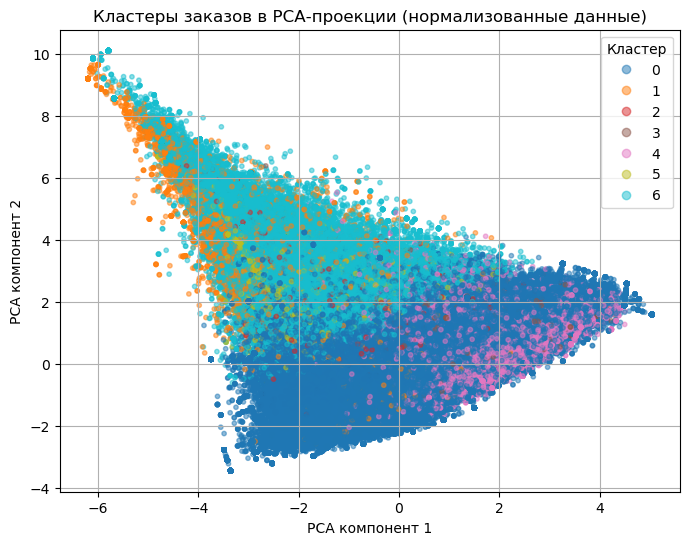

In [17]:
from sklearn.decomposition import PCA

print("\n–°—Ç—Ä–æ–∏–º PCA‚Äë–ø—Ä–æ–µ–∫—Ü–∏—é‚Ä¶")

pca   = PCA(n_components=2, random_state=RANDOM_STATE)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1],
                      c=order_segments, cmap='tab10', s=10, alpha=0.5)
plt.title("–ö–ª–∞—Å—Ç–µ—Ä—ã –∑–∞–∫–∞–∑–æ–≤ –≤ PCA‚Äë–ø—Ä–æ–µ–∫—Ü–∏–∏ (–Ω–æ—Ä–º–∞–ª–∏–∑–æ–≤–∞–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ)")
plt.xlabel("PCA –∫–æ–º–ø–æ–Ω–µ–Ω—Ç¬†1");  plt.ylabel("PCA –∫–æ–º–ø–æ–Ω–µ–Ω—Ç¬†2")
plt.legend(*scatter.legend_elements(), title="–ö–ª–∞—Å—Ç–µ—Ä");  plt.grid(True);  plt.show()

In [18]:
order_seg_df = pd.DataFrame({'order_id': order_ids,
                             'order_segment': order_segments})
out_path = DATA_DIR / 'order_segments.csv'
order_seg_df.to_csv(out_path, index=False)
print(f'–§–∞–π–ª —Å–æ—Ö—Ä–∞–Ω—ë–Ω ‚Üí {out_path.resolve()}')

–§–∞–π–ª —Å–æ—Ö—Ä–∞–Ω—ë–Ω ‚Üí D:\instacart\archive\order_segments.csv


In [24]:
# %% [save_artifacts]  ‚Üê¬†–ø–æ—Å–ª–µ —Ä–∞—Å—á—ë—Ç–∞ cluster_desc
from pathlib import Path
import joblib, gc, json

ART_DIR = Path('model_artifacts'); ART_DIR.mkdir(exist_ok=True, parents=True)

# 1Ô∏è‚É£  scaler + kmeans
joblib.dump(scaler_full, ART_DIR/'scaler.pkl')
joblib.dump(kmeans,      ART_DIR/'kmeans.pkl')

# 2Ô∏è‚É£  —Å–ø–∏—Å–æ–∫ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ (—Å—Ç—Ä–æ–∫–æ–≤—ã–µ –Ω–∞–∑–≤–∞–Ω–∏—è aisle!)
aisle_cols_names = [aisle_name[a] for a in order_aisle.columns]
json.dump(aisle_cols_names, open(ART_DIR/'aisle_columns.json','w'))

# 3Ô∏è‚É£  product_id ‚Üí aisle_name  (—Ç–æ–ª—å–∫–æ –≤–Ω—É—Ç—Ä–∏ –æ—Å—Ç–∞–≤—à–∏—Ö—Å—è 123 –∫–∞—Ç–µ–≥–æ—Ä–∏–π)
valid_products = products[products['aisle_id'].isin(order_aisle.columns)]
prod2aisle = (
    valid_products
      .merge(aisles, on='aisle_id', how='left')
      .set_index('product_id')['aisle']
      .to_dict()
)
joblib.dump(prod2aisle, ART_DIR/'product2aisle.pkl')

# 4Ô∏è‚É£  —á–∞—Å—Ç—ã–µ aisle (—Ç–µ –∂–µ 123)
json.dump(aisle_cols_names, open(ART_DIR/'frequent_aisles.json','w'))

# 5Ô∏è‚É£  –æ–ø–∏—Å–∞–Ω–∏–µ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ (–¥–ª—è —Å–ø—Ä–∞–≤–∫–∏)
cluster_desc.to_csv(ART_DIR/'cluster_desc.csv', index=False)

print('‚úÖ –ê—Ä—Ç–µ—Ñ–∞–∫—Ç—ã —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã –≤', ART_DIR.resolve())
gc.collect()

‚úÖ –ê—Ä—Ç–µ—Ñ–∞–∫—Ç—ã —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã –≤ C:\Users\nezir\OneDrive\–†–∞–±–æ—á–∏–π —Å—Ç–æ–ª\ipynb\recsys retail rocket\model_artifacts


32